<a href="https://colab.research.google.com/github/MariaSheikh/LSE-HACK/blob/main/TrueCue_Hack_Code_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
import numpy as np
numeric_columns = list(data.select_dtypes(include=np.number).columns)
categorical_columns = list(data.select_dtypes(include="object").columns)

In [ ]:
data[numeric_columns].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data[categorical_columns].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(column,': ',data[column].nunique())
        print(data[column].value_counts().sort_values())
        print('\n')

Attrition :  2
Yes     237
No     1233
Name: Attrition, dtype: int64


BusinessTravel :  3
Non-Travel            150
Travel_Frequently     277
Travel_Rarely        1043
Name: BusinessTravel, dtype: int64


Department :  3
Human Resources            63
Sales                     446
Research & Development    961
Name: Department, dtype: int64


EducationField :  6
Human Resources      27
Other                82
Technical Degree    132
Marketing           159
Medical             464
Life Sciences       606
Name: EducationField, dtype: int64


Gender :  2
Female    588
Male      882
Name: Gender, dtype: int64


JobRole :  9
Human Resources               52
Research Director             80
Sales Representative          83
Manager                      102
Healthcare Representative    131
Manufacturing Director       145
Laboratory Technician        259
Research Scientist           292
Sales Executive              326
Name: JobRole, dtype: int64


MaritalStatus :  3
Divorced    327
Single    

In [ ]:
#Attrition , Yes=1, No=0

data['Attrition'] = np.where(data['Attrition'] =='No', 0, data['Attrition'])
data['Attrition'] = np.where(data['Attrition'] =='Yes', 1, data['Attrition'])

#BUSINESSTRAVEL,  Non-Travel=0,  Travel_Frequently=1, Travel_Rarely=2
data['BusinessTravel'] = np.where(data['BusinessTravel'] =='Non-Travel', 0, data['BusinessTravel'])
data['BusinessTravel'] = np.where(data['BusinessTravel'] =='Travel_Frequently', 1, data['BusinessTravel'])
data['BusinessTravel'] = np.where(data['BusinessTravel'] =='Travel_Rarely', 2, data['BusinessTravel'])




In [ ]:
#Department, Human Resources=0 , Sales= 1 ,Research & Development=2
data['Department'] = np.where(data['Department'] =='Human Resources', 0, data['Department'])
data['Department'] = np.where(data['Department'] =='Sales', 1, data['Department'])
data['Department'] = np.where(data['Department'] =='Research & Development', 2, data['Department'])


#EducationField, Human Resources=0, Other=1,Technical Degree=2 ,Marketing=3, Medical=4, Life Sciences=5
data['EducationField'] = np.where(data['EducationField'] =='Human Resources', 0, data['EducationField'])
data['EducationField'] = np.where(data['EducationField'] =='Other', 1, data['EducationField'])
data['EducationField'] = np.where(data['EducationField'] =='Technical Degree', 2, data['EducationField'])
data['EducationField'] = np.where(data['EducationField'] =='Marketing', 3, data['EducationField'])
data['EducationField'] = np.where(data['EducationField'] =='Medical', 4, data['EducationField'])
data['EducationField'] = np.where(data['EducationField'] =='Life Sciences', 5, data['EducationField'])


In [ ]:
#Gender, Female=0, Male=1
data['Gender'] = np.where(data['Gender'] =='Female', 0, data['Gender'])
data['Gender'] = np.where(data['Gender'] =='Male', 1, data['Gender'])


#JobRole, Human Resources=0, Research Director=1, Sales Representative=2, Manager=3,  Healthcare Representative =4, Manufacturing Director=5,
# Laboratory Technician =6, Research Scientist=7 , Sales Executive=8
data['JobRole'] = np.where(data['JobRole'] =='Human Resources', 0, data['JobRole'])
data['JobRole'] = np.where(data['JobRole'] =='Research Director', 1, data['JobRole'])
data['JobRole'] = np.where(data['JobRole'] =='Sales Representative', 2, data['JobRole'])
data['JobRole'] = np.where(data['JobRole'] =='Manager', 3, data['JobRole'])
data['JobRole'] = np.where(data['JobRole'] =='Healthcare Representative', 4, data['JobRole'])
data['JobRole'] = np.where(data['JobRole'] =='Manufacturing Director', 5, data['JobRole'])
data['JobRole'] = np.where(data['JobRole'] =='Laboratory Technician', 6, data['JobRole'])
data['JobRole'] = np.where(data['JobRole'] =='Research Scientist', 7, data['JobRole'])
data['JobRole'] = np.where(data['JobRole'] =='Sales Executive', 8, data['JobRole'])


In [ ]:
#MaritalStatus, Divorced =0, Single=1, Married=2 Name: MaritalStatus
data['MaritalStatus'] = np.where(data['MaritalStatus'] =='Divorced', 0, data['MaritalStatus'])
data['MaritalStatus'] = np.where(data['MaritalStatus'] =='Single', 1, data['MaritalStatus'])
data['MaritalStatus'] = np.where(data['MaritalStatus'] =='Married', 2, data['MaritalStatus'])



#OverTime, Yes=1 , No=0
data['OverTime'] = np.where(data['OverTime'] =='No', 0, data['OverTime'])
data['OverTime'] = np.where(data['OverTime'] =='Yes', 1, data['OverTime'])


In [ ]:
data = data.drop(['Over18'], axis = 1)


In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,1,1,2,5,1,1,2,0,94,3,2,8,4,1,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,2,8,1,5,1,2,3,1,61,2,2,7,2,2,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,2,2,2,1,1,4,4,1,92,2,1,6,3,1,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,2,3,4,5,1,5,4,0,56,3,1,7,3,2,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,2,2,1,4,1,7,1,1,40,3,1,6,2,2,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


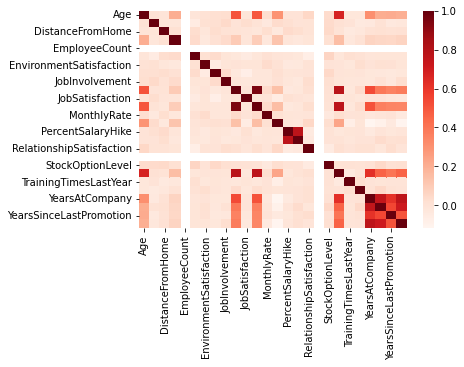

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),cmap='Reds')

In [ ]:
data = data.drop(['EmployeeCount','StandardHours'], axis = 1)


In [ ]:
data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


In [ ]:
X = data.drop('Attrition', axis=1)
y = pd.DataFrame(data['Attrition'])

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Attrition  1470 non-null   object
dtypes: object(1)
memory usage: 11.6+ KB


In [ ]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

rfC1 = AdaBoostClassifier()




In [ ]:
y_train=y_train.astype('int')

In [ ]:
rfC1.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [ ]:
y_test_predict = rfC1.predict(X_test)


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def Performance_metrix(y_test, pred):
    TN, FP, FN, TP = confusion_matrix(y_test, pred).ravel()
    Population = TN+FN+TP+FP
    Accuracy   =(TP+TN) / Population
    Precision  = TP / (TP+FP) 
    NPV= TN / (TN+FN)
    Sensitivity= TP/(TP+FN)
    Specificity= TN/(TN+FP)
    print('Accuracy: ' , Accuracy, 'Sensitivity: ', Sensitivity, 'Specificity: ', Specificity,'\n\nPositive predictive value: ' , Precision, 'Negative predictive value: ',  NPV)

In [ ]:
y_test=y_test.astype('int')

In [ ]:
#roc=roc_auc_score(y_test, Bagging_model.predict_proba(X_test)[:,1])
Performance_metrix(y_test,y_test_predict)


Accuracy:  0.8435374149659864 Sensitivity:  0.3246753246753247 Specificity:  0.9532967032967034 

Positive predictive value:  0.5952380952380952 Negative predictive value:  0.8696741854636592


In [ ]:
data.to_csv('Attrition Dataset.csv', index=False)